In [3]:
##Convolutional Neural Networks (CNNs): Excellent for image classification due to their ability to learn spatial hierarchies of features.

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define image preprocessing parameters
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255) 

# Load training and test data
train_data_dir = r"E:\Sooty_mold\train" 
test_data_dir = r"E:\Sooty_mold\test"

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical' 
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical' 
)

# Create a simple CNN model (Corrected MaxPooling2D)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),  # Add arguments to MaxPooling2D
    Flatten(),
    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax') 
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20
)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_generator)
print('Test accuracy:', accuracy)

Found 1725 images belonging to 2 classes.
Found 432 images belonging to 2 classes.


E:\Programfiles\ANACONDA\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


E:\Programfiles\ANACONDA\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


53/53 ━━━━━━━━━━━━━━━━━━━━ 31s 471ms/step - accuracy: 0.7673 - loss: 1.0481
Epoch 2/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - accuracy: 0.8125 - loss: 0.3269 
Epoch 3/20


E:\Programfiles\ANACONDA\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


53/53 ━━━━━━━━━━━━━━━━━━━━ 28s 485ms/step - accuracy: 0.9042 - loss: 0.2394
Epoch 4/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step - accuracy: 0.8750 - loss: 0.2114 
Epoch 5/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 28s 475ms/step - accuracy: 0.9299 - loss: 0.1684
Epoch 6/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step - accuracy: 0.9688 - loss: 0.1355 
Epoch 7/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 28s 477ms/step - accuracy: 0.9481 - loss: 0.1303
Epoch 8/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step - accuracy: 1.0000 - loss: 0.0623 
Epoch 9/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 28s 484ms/step - accuracy: 0.9643 - loss: 0.0842
Epoch 10/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - accuracy: 1.0000 - loss: 0.0219 
Epoch 11/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 30s 518ms/step - accuracy: 0.9819 - loss: 0.0489
Epoch 12/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step - accuracy: 1.0000 - loss: 0.0086 
Epoch 13/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 28s 486ms/step - accuracy: 0.9813 - loss: 0.0379
Epoch 14/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/st

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


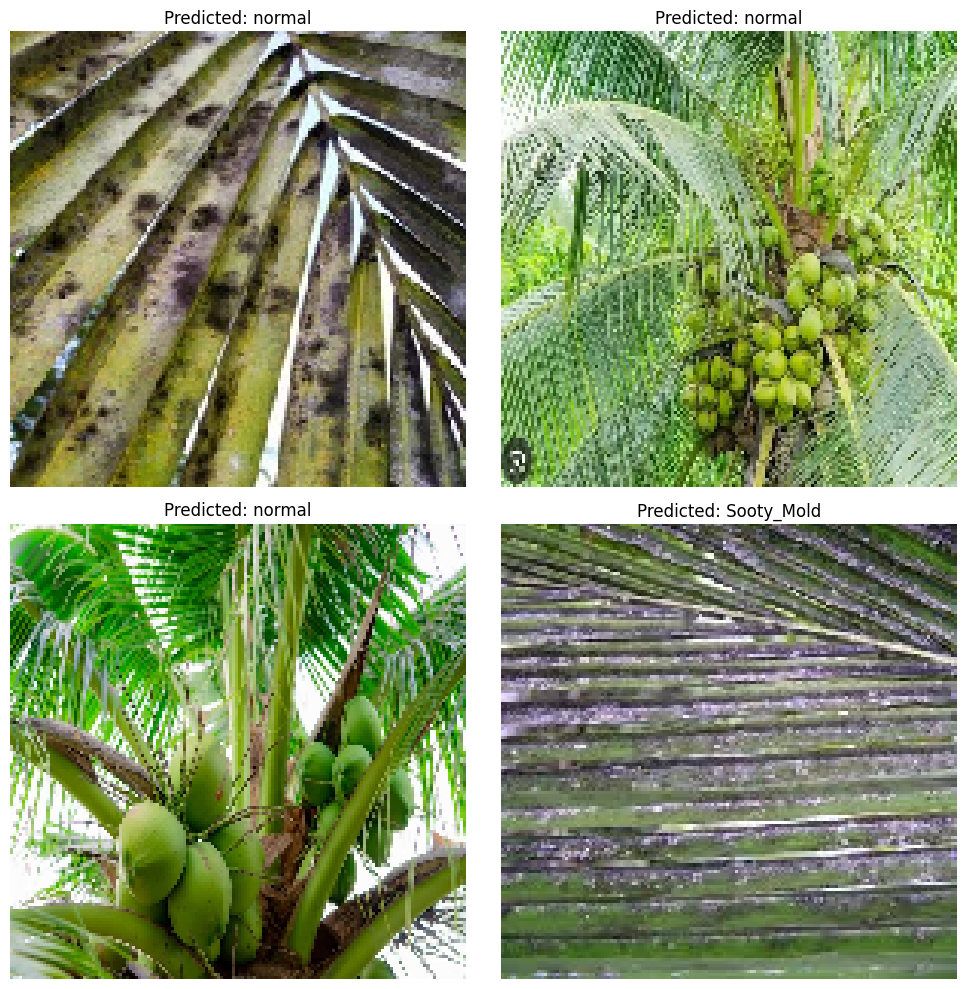

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

def process_and_predict(image_path, model, class_labels):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(150, 150))  
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Rescale pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    predictions = model.predict(img_array)

    # Get the predicted class
    predicted_class_index = np.argmax(predictions)
    predicted_class_label = list(class_labels.keys())[list(class_labels.values()).index(predicted_class_index)]

    return img, predicted_class_label

image_paths = [
    r"E:\leaf1.jpg",
    r"E:\leaf2.jpg",
    r"E:\leaf3.jpg",
    r"E:\leaf4.jpg"
]
class_labels = train_generator.class_indices 

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for i, image_path in enumerate(image_paths):
    img, predicted_class_label = process_and_predict(image_path, model, class_labels)
    
    ax = axes[i // 2, i % 2]

    ax.imshow(img)
    ax.set_title(f"Predicted: {predicted_class_label}")
    ax.axis('off')  # Hide the axis labels

plt.tight_layout()
plt.show()


14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 258ms/step


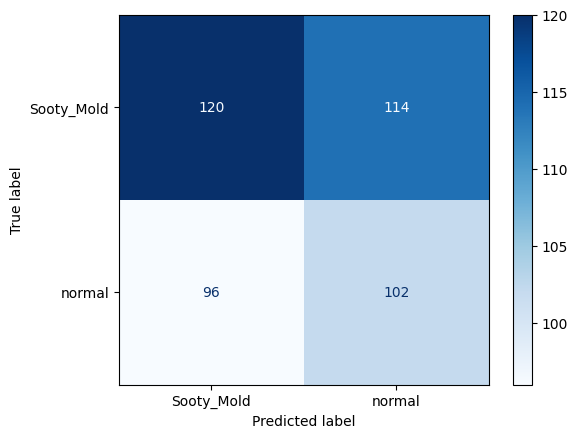

In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the test set
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices)
disp.plot(cmap=plt.cm.Blues)
plt.show()

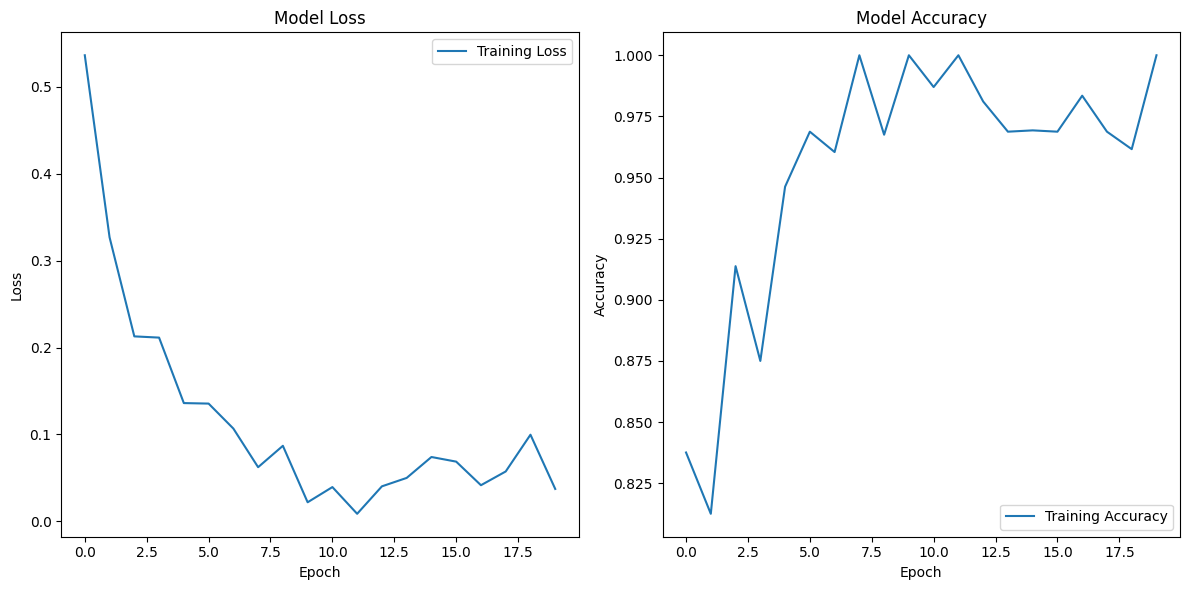

In [6]:
# Plot training & validation loss and accuracy values
plt.figure(figsize=(12, 6))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

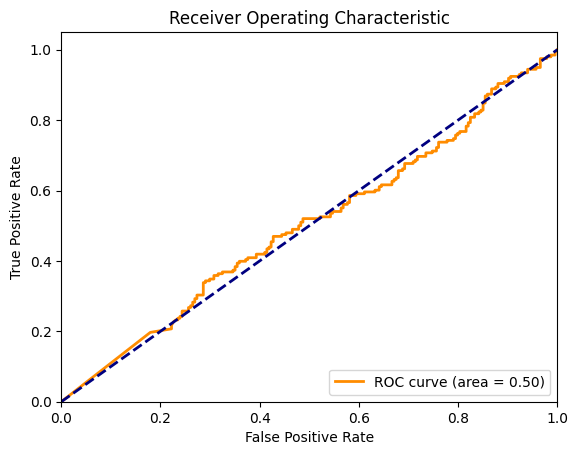

In [7]:
from sklearn.metrics import roc_curve, auc

# Assuming binary classification, so we only need the probabilities for the positive class
y_pred_prob = y_pred[:, 1]  # Probability of the second class (assuming positive class)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [8]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

# Assuming your model is already defined and compiled
model.summary()  # This will print the summary in the console

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    10,616,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,909,832 (121.73 MB)

 Trainable params: 10,636,610 (40.58 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 21,273,222 (81.15 MB)

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd
import os

# Define image preprocessing parameters
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load training and test data
train_data_dir = r"E:\Sooty_mold\train"
test_data_dir = r"E:\Sooty_mold\test"

# Get all file paths and labels from the training directory
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # To ensure correct mapping between filenames and labels
)

filenames = train_generator.filenames
labels = train_generator.classes
class_indices = train_generator.class_indices

# Map integer labels to class names
class_names = {v: k for k, v in class_indices.items()}
df = pd.DataFrame({
    'filename': [os.path.join(train_data_dir, f) for f in filenames],
    'label': [class_names[label] for label in labels]  # Map integer labels to class names
})

num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=123)

acc_per_fold = []
loss_per_fold = []

fold_no = 1

for train_index, val_index in kfold.split(df):
    print(f'Training for fold {fold_no} ...')

    # Split the data for this fold
    train_data = df.iloc[train_index]
    val_data = df.iloc[val_index]

    # Create data generators for this fold
    train_generator_fold = train_datagen.flow_from_dataframe(
        train_data,
        x_col='filename',
        y_col='label',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        shuffle=True
    )

    val_generator_fold = train_datagen.flow_from_dataframe(
        val_data,
        x_col='filename',
        y_col='label',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        shuffle=False
    )

    # Create a new model instance for each fold
    model = Sequential()
    model.add(Input(shape=(150, 150, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(train_generator.num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    history = model.fit(
        train_generator_fold,
        epochs=20,
        validation_data=val_generator_fold
    )

    # Evaluate the model on the test set
    scores = model.evaluate(test_generator)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    fold_no += 1

# Print average scores
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

Found 1725 images belonging to 2 classes.
Training for fold 1 ...
Found 1380 validated image filenames belonging to 2 classes.
Found 345 validated image filenames belonging to 2 classes.
Epoch 1/20


E:\Programfiles\ANACONDA\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


44/44 ━━━━━━━━━━━━━━━━━━━━ 33s 616ms/step - accuracy: 0.6272 - loss: 1.3450 - val_accuracy: 0.8667 - val_loss: 0.2944
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 29s 600ms/step - accuracy: 0.8808 - loss: 0.2722 - val_accuracy: 0.9333 - val_loss: 0.1480
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 27s 565ms/step - accuracy: 0.9210 - loss: 0.1972 - val_accuracy: 0.9072 - val_loss: 0.1877
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 28s 576ms/step - accuracy: 0.9287 - loss: 0.1745 - val_accuracy: 0.9739 - val_loss: 0.0996
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 30s 619ms/step - accuracy: 0.9667 - loss: 0.1014 - val_accuracy: 0.9826 - val_loss: 0.0748
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 30s 621ms/step - accuracy: 0.9681 - loss: 0.0800 - val_accuracy: 0.9942 - val_loss: 0.0424
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 26s 536ms/step - accuracy: 0.9763 - loss: 0.0635 - val_accuracy: 0.9855 - val_loss: 0.0428
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 25s 516ms/step - accuracy: 0.9969 - loss: 0.0209 - val_accuracy: 0.988

E:\Programfiles\ANACONDA\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


44/44 ━━━━━━━━━━━━━━━━━━━━ 24s 453ms/step - accuracy: 0.6784 - loss: 2.5271 - val_accuracy: 0.8696 - val_loss: 0.3668
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 22s 459ms/step - accuracy: 0.8927 - loss: 0.2673 - val_accuracy: 0.9014 - val_loss: 0.2687
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 22s 459ms/step - accuracy: 0.9351 - loss: 0.1962 - val_accuracy: 0.9101 - val_loss: 0.2362
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 20s 426ms/step - accuracy: 0.9473 - loss: 0.1614 - val_accuracy: 0.9478 - val_loss: 0.1462
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 22s 455ms/step - accuracy: 0.9719 - loss: 0.0935 - val_accuracy: 0.9304 - val_loss: 0.2007
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 22s 450ms/step - accuracy: 0.9557 - loss: 0.1203 - val_accuracy: 0.8812 - val_loss: 0.2796
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 24s 501ms/step - accuracy: 0.9671 - loss: 0.0842 - val_accuracy: 0.9507 - val_loss: 0.0977
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 24s 498ms/step - accuracy: 0.9546 - loss: 0.1099 - val_accuracy: 0.933

E:\Programfiles\ANACONDA\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


44/44 ━━━━━━━━━━━━━━━━━━━━ 30s 565ms/step - accuracy: 0.6925 - loss: 1.0172 - val_accuracy: 0.8957 - val_loss: 0.2370
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 28s 580ms/step - accuracy: 0.9013 - loss: 0.2288 - val_accuracy: 0.9275 - val_loss: 0.1730
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 25s 512ms/step - accuracy: 0.9255 - loss: 0.1772 - val_accuracy: 0.9391 - val_loss: 0.1406
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 26s 538ms/step - accuracy: 0.9409 - loss: 0.1455 - val_accuracy: 0.9594 - val_loss: 0.1503
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 26s 528ms/step - accuracy: 0.9398 - loss: 0.1530 - val_accuracy: 0.9739 - val_loss: 0.0807
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 26s 542ms/step - accuracy: 0.9756 - loss: 0.0770 - val_accuracy: 0.9884 - val_loss: 0.0553
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 26s 534ms/step - accuracy: 0.9655 - loss: 0.0832 - val_accuracy: 0.9797 - val_loss: 0.0569
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 26s 534ms/step - accuracy: 0.9867 - loss: 0.0512 - val_accuracy: 0.982

E:\Programfiles\ANACONDA\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


44/44 ━━━━━━━━━━━━━━━━━━━━ 29s 557ms/step - accuracy: 0.6487 - loss: 1.3939 - val_accuracy: 0.8986 - val_loss: 0.2337
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 26s 545ms/step - accuracy: 0.8952 - loss: 0.2656 - val_accuracy: 0.9159 - val_loss: 0.1716
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 30s 626ms/step - accuracy: 0.9118 - loss: 0.1923 - val_accuracy: 0.9101 - val_loss: 0.1852
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 30s 616ms/step - accuracy: 0.9163 - loss: 0.1742 - val_accuracy: 0.9478 - val_loss: 0.1094
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 29s 593ms/step - accuracy: 0.9496 - loss: 0.1252 - val_accuracy: 0.9652 - val_loss: 0.0984
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 29s 598ms/step - accuracy: 0.9686 - loss: 0.1005 - val_accuracy: 0.9652 - val_loss: 0.0821
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 31s 645ms/step - accuracy: 0.9787 - loss: 0.0630 - val_accuracy: 0.9188 - val_loss: 0.1443
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 30s 608ms/step - accuracy: 0.9634 - loss: 0.0935 - val_accuracy: 0.953

E:\Programfiles\ANACONDA\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


44/44 ━━━━━━━━━━━━━━━━━━━━ 34s 637ms/step - accuracy: 0.6897 - loss: 1.9848 - val_accuracy: 0.8754 - val_loss: 0.3174
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 29s 595ms/step - accuracy: 0.8734 - loss: 0.2873 - val_accuracy: 0.9217 - val_loss: 0.2125
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 30s 624ms/step - accuracy: 0.9010 - loss: 0.2191 - val_accuracy: 0.8957 - val_loss: 0.2249
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 29s 586ms/step - accuracy: 0.9260 - loss: 0.1954 - val_accuracy: 0.9043 - val_loss: 0.2025
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 29s 593ms/step - accuracy: 0.9300 - loss: 0.1634 - val_accuracy: 0.9478 - val_loss: 0.1220
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 28s 566ms/step - accuracy: 0.9552 - loss: 0.1212 - val_accuracy: 0.9565 - val_loss: 0.1284
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 25s 517ms/step - accuracy: 0.9598 - loss: 0.1035 - val_accuracy: 0.9333 - val_loss: 0.1517
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 23s 474ms/step - accuracy: 0.9575 - loss: 0.0919 - val_accuracy: 0.930

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


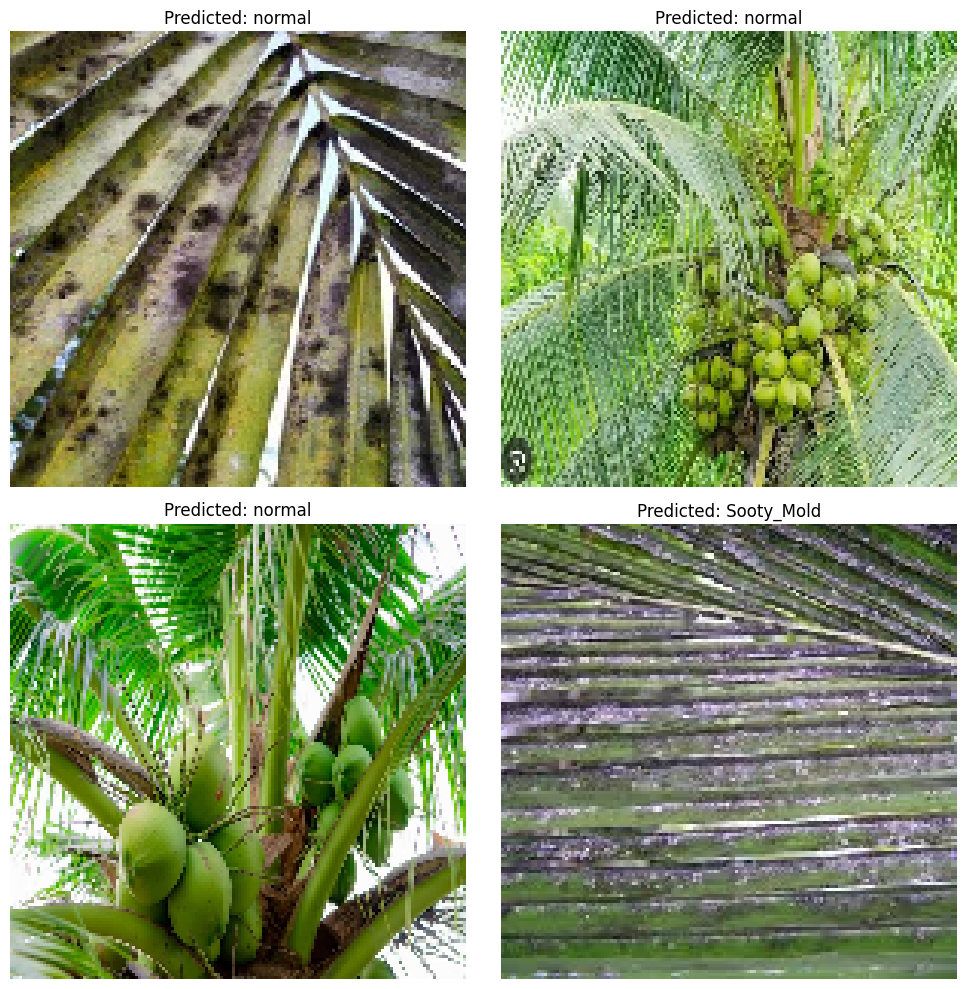

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

def process_and_predict(image_path, model, class_labels):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(150, 150))  
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Rescale pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    predictions = model.predict(img_array)

    # Get the predicted class
    predicted_class_index = np.argmax(predictions)
    predicted_class_label = list(class_labels.keys())[list(class_labels.values()).index(predicted_class_index)]

    return img, predicted_class_label

image_paths = [
    r"E:\leaf1.jpg",
    r"E:\leaf2.jpg",
    r"E:\leaf3.jpg",
    r"E:\leaf4.jpg"
]
class_labels = train_generator.class_indices 

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for i, image_path in enumerate(image_paths):
    img, predicted_class_label = process_and_predict(image_path, model, class_labels)
    
    ax = axes[i // 2, i % 2]

    ax.imshow(img)
    ax.set_title(f"Predicted: {predicted_class_label}")
    ax.axis('off')  # Hide the axis labels

plt.tight_layout()
plt.show()


14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 235ms/step


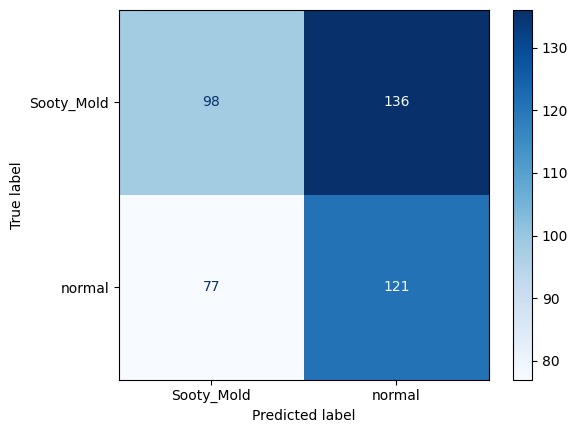

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the test set
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices)
disp.plot(cmap=plt.cm.Blues)
plt.show()

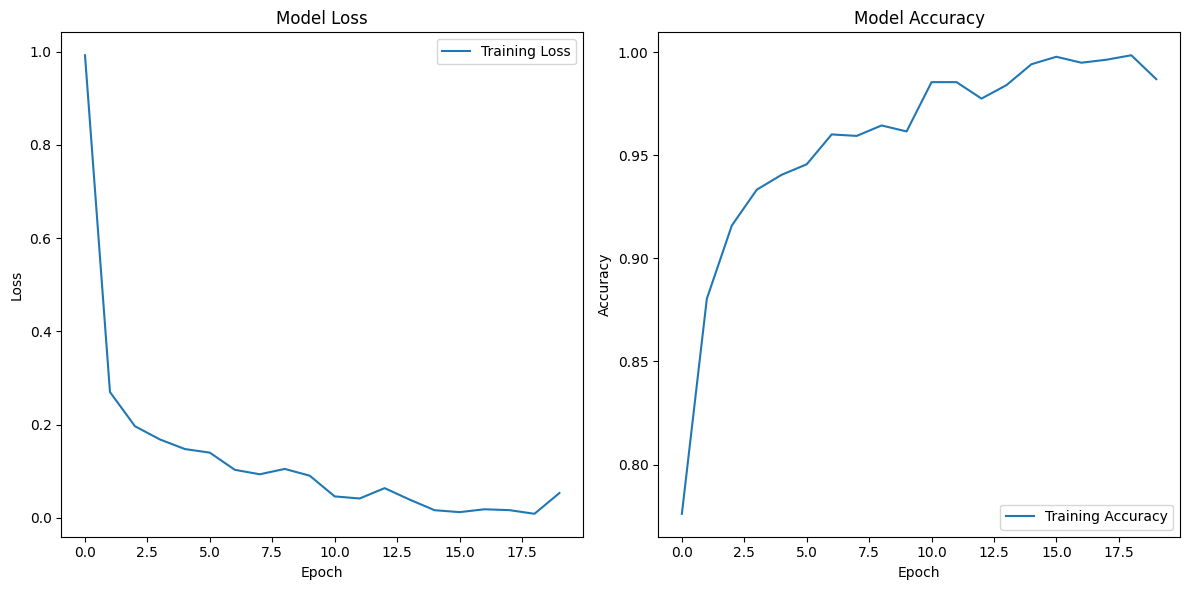

In [12]:
# Plot training & validation loss and accuracy values
plt.figure(figsize=(12, 6))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

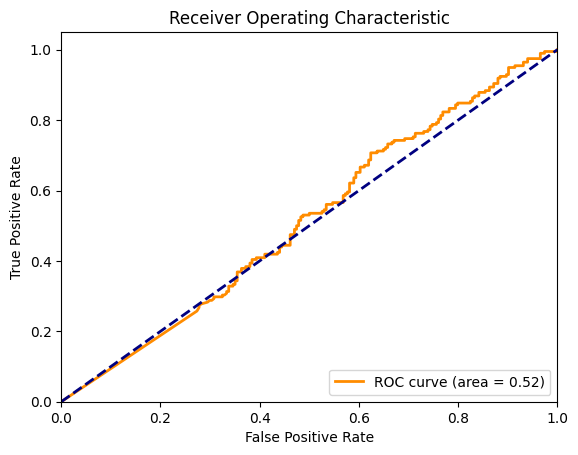

In [13]:
from sklearn.metrics import roc_curve, auc

# Assuming binary classification, so we only need the probabilities for the positive class
y_pred_prob = y_pred[:, 1]  # Probability of the second class (assuming positive class)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# 50 EPOCHS

In [27]:
##Convolutional Neural Networks (CNNs): Excellent for image classification due to their ability to learn spatial hierarchies of features.

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define image preprocessing parameters
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255) 

# Load training and test data
train_data_dir = r"E:\Sooty_mold\train" 
test_data_dir = r"E:\Sooty_mold\test"

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical' 
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical' 
)

# Create a simple CNN model (Corrected MaxPooling2D)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),  # Add arguments to MaxPooling2D
    Flatten(),
    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax') 
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50
)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_generator)
print('Test accuracy:', accuracy)

Found 1725 images belonging to 2 classes.
Found 432 images belonging to 2 classes.


E:\Programfiles\ANACONDA\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


E:\Programfiles\ANACONDA\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


53/53 ━━━━━━━━━━━━━━━━━━━━ 60s 823ms/step - accuracy: 0.6323 - loss: 1.3336
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - accuracy: 0.9688 - loss: 0.1852 
Epoch 3/50


E:\Programfiles\ANACONDA\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


53/53 ━━━━━━━━━━━━━━━━━━━━ 27s 452ms/step - accuracy: 0.8835 - loss: 0.3018
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step - accuracy: 0.8750 - loss: 0.2638 
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 27s 453ms/step - accuracy: 0.9000 - loss: 0.2415
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step - accuracy: 0.8750 - loss: 0.2446 
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 27s 462ms/step - accuracy: 0.9192 - loss: 0.1871
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - accuracy: 0.9062 - loss: 0.1801 
Epoch 9/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 23s 389ms/step - accuracy: 0.9341 - loss: 0.1654
Epoch 10/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - accuracy: 0.8438 - loss: 0.3250 
Epoch 11/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 22s 391ms/step - accuracy: 0.9500 - loss: 0.1405
Epoch 12/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 192us/step - accuracy: 0.9688 - loss: 0.0691
Epoch 13/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 24s 411ms/step - accuracy: 0.9651 - loss: 0.0966
Epoch 14/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/ste

14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 220ms/step


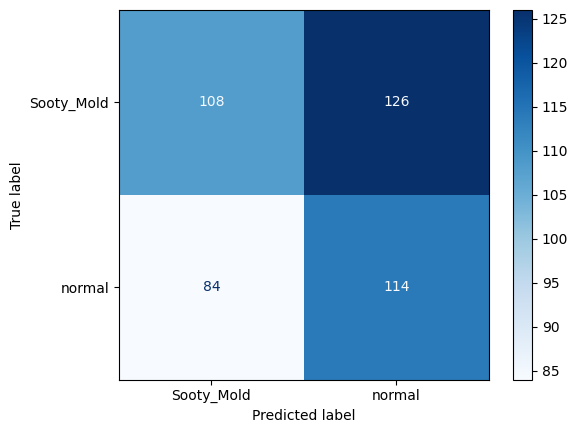

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the test set
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices)
disp.plot(cmap=plt.cm.Blues)
plt.show()

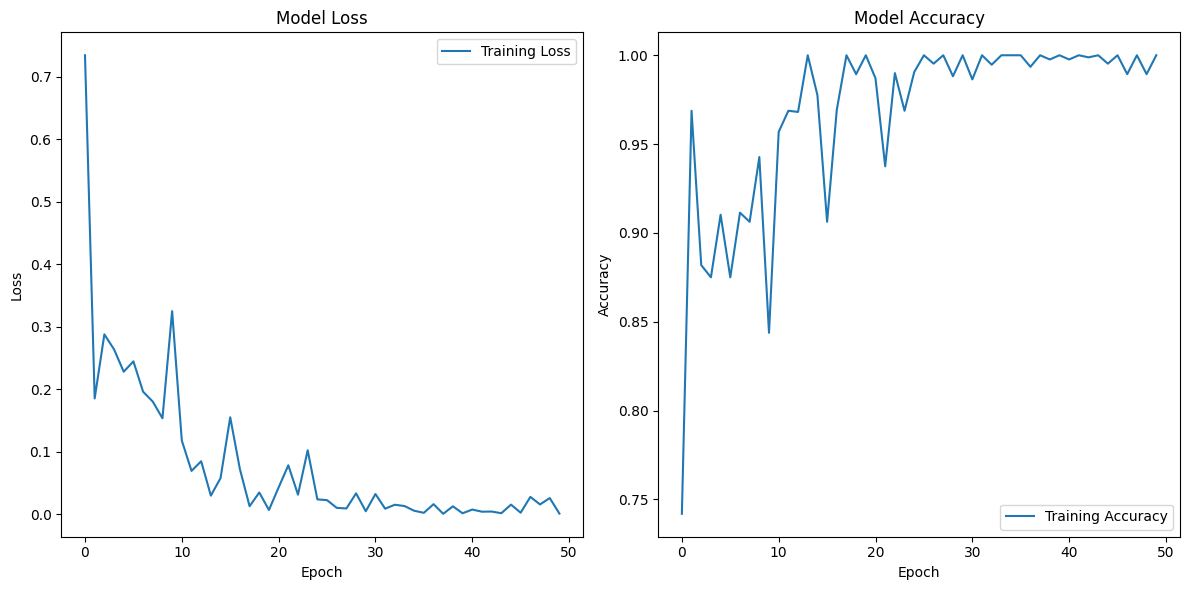

In [29]:
# Plot training & validation loss and accuracy values
plt.figure(figsize=(12, 6))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

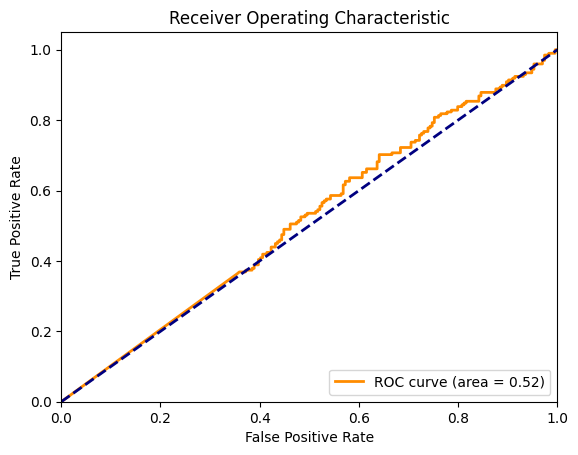

In [30]:
from sklearn.metrics import roc_curve, auc

# Assuming binary classification, so we only need the probabilities for the positive class
y_pred_prob = y_pred[:, 1]  # Probability of the second class (assuming positive class)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [21]:
#K FOLD

In [22]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd
import os

# Define image preprocessing parameters
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load training and test data
train_data_dir = r"E:\Sooty_mold\train"
test_data_dir = r"E:\Sooty_mold\test"

# Get all file paths and labels from the training directory
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # To ensure correct mapping between filenames and labels
)

filenames = train_generator.filenames
labels = train_generator.classes
class_indices = train_generator.class_indices

# Map integer labels to class names
class_names = {v: k for k, v in class_indices.items()}
df = pd.DataFrame({
    'filename': [os.path.join(train_data_dir, f) for f in filenames],
    'label': [class_names[label] for label in labels]  # Map integer labels to class names
})

num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=123)

acc_per_fold = []
loss_per_fold = []

fold_no = 1

for train_index, val_index in kfold.split(df):
    print(f'Training for fold {fold_no} ...')

    # Split the data for this fold
    train_data = df.iloc[train_index]
    val_data = df.iloc[val_index]

    # Create data generators for this fold
    train_generator_fold = train_datagen.flow_from_dataframe(
        train_data,
        x_col='filename',
        y_col='label',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        shuffle=True
    )

    val_generator_fold = train_datagen.flow_from_dataframe(
        val_data,
        x_col='filename',
        y_col='label',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        shuffle=False
    )

    # Create a new model instance for each fold
    model = Sequential()
    model.add(Input(shape=(150, 150, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(train_generator.num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    history = model.fit(
        train_generator_fold,
        epochs=50,
        validation_data=val_generator_fold
    )

    # Evaluate the model on the test set
    scores = model.evaluate(test_generator)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    fold_no += 1

# Print average scores
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

Found 1725 images belonging to 2 classes.
Training for fold 1 ...
Found 1380 validated image filenames belonging to 2 classes.
Found 345 validated image filenames belonging to 2 classes.
Epoch 1/50


E:\Programfiles\ANACONDA\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


44/44 ━━━━━━━━━━━━━━━━━━━━ 29s 556ms/step - accuracy: 0.7480 - loss: 0.7152 - val_accuracy: 0.8928 - val_loss: 0.2528
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 28s 575ms/step - accuracy: 0.8643 - loss: 0.3245 - val_accuracy: 0.9188 - val_loss: 0.2012
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 41s 894ms/step - accuracy: 0.8979 - loss: 0.1911 - val_accuracy: 0.9362 - val_loss: 0.1450
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 28s 577ms/step - accuracy: 0.9353 - loss: 0.1548 - val_accuracy: 0.9420 - val_loss: 0.1403
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 22s 464ms/step - accuracy: 0.9485 - loss: 0.1138 - val_accuracy: 0.9217 - val_loss: 0.1666
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 22s 455ms/step - accuracy: 0.9261 - loss: 0.1514 - val_accuracy: 0.9565 - val_loss: 0.1147
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 22s 457ms/step - accuracy: 0.9716 - loss: 0.0759 - val_accuracy: 0.9449 - val_loss: 0.1453
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 22s 453ms/step - accuracy: 0.9613 - loss: 0.1057 - val_accuracy: 0.979

E:\Programfiles\ANACONDA\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


44/44 ━━━━━━━━━━━━━━━━━━━━ 26s 520ms/step - accuracy: 0.6422 - loss: 0.9885 - val_accuracy: 0.8754 - val_loss: 0.2890
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 23s 481ms/step - accuracy: 0.9284 - loss: 0.1929 - val_accuracy: 0.8783 - val_loss: 0.3547
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 24s 500ms/step - accuracy: 0.9293 - loss: 0.1740 - val_accuracy: 0.9304 - val_loss: 0.1584
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 24s 489ms/step - accuracy: 0.9555 - loss: 0.0977 - val_accuracy: 0.9217 - val_loss: 0.2043
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 23s 472ms/step - accuracy: 0.9492 - loss: 0.1179 - val_accuracy: 0.9565 - val_loss: 0.1106
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 22s 457ms/step - accuracy: 0.9733 - loss: 0.0661 - val_accuracy: 0.9478 - val_loss: 0.1289
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 23s 494ms/step - accuracy: 0.9692 - loss: 0.0734 - val_accuracy: 0.9449 - val_loss: 0.1299
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 24s 489ms/step - accuracy: 0.9829 - loss: 0.0452 - val_accuracy: 0.956

E:\Programfiles\ANACONDA\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


44/44 ━━━━━━━━━━━━━━━━━━━━ 28s 535ms/step - accuracy: 0.6386 - loss: 1.4361 - val_accuracy: 0.8087 - val_loss: 0.5443
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 24s 504ms/step - accuracy: 0.8007 - loss: 0.4468 - val_accuracy: 0.8667 - val_loss: 0.3217
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 25s 522ms/step - accuracy: 0.8966 - loss: 0.2421 - val_accuracy: 0.8986 - val_loss: 0.2614
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 24s 496ms/step - accuracy: 0.9196 - loss: 0.2038 - val_accuracy: 0.9478 - val_loss: 0.1325
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 24s 513ms/step - accuracy: 0.9512 - loss: 0.1296 - val_accuracy: 0.9391 - val_loss: 0.1246
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 24s 509ms/step - accuracy: 0.9665 - loss: 0.1020 - val_accuracy: 0.9014 - val_loss: 0.2107
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 25s 511ms/step - accuracy: 0.9678 - loss: 0.0858 - val_accuracy: 0.9623 - val_loss: 0.0760
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 25s 518ms/step - accuracy: 0.9599 - loss: 0.0938 - val_accuracy: 0.956

E:\Programfiles\ANACONDA\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


44/44 ━━━━━━━━━━━━━━━━━━━━ 34s 638ms/step - accuracy: 0.5677 - loss: 1.7239 - val_accuracy: 0.8029 - val_loss: 0.5152
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 30s 608ms/step - accuracy: 0.8161 - loss: 0.4147 - val_accuracy: 0.8928 - val_loss: 0.2135
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 27s 560ms/step - accuracy: 0.9089 - loss: 0.2044 - val_accuracy: 0.8957 - val_loss: 0.2127
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 27s 560ms/step - accuracy: 0.9136 - loss: 0.2042 - val_accuracy: 0.9275 - val_loss: 0.1485
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 28s 565ms/step - accuracy: 0.9534 - loss: 0.1310 - val_accuracy: 0.9681 - val_loss: 0.0874
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 27s 565ms/step - accuracy: 0.9651 - loss: 0.0952 - val_accuracy: 0.9507 - val_loss: 0.1005
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 27s 559ms/step - accuracy: 0.9596 - loss: 0.1061 - val_accuracy: 0.9739 - val_loss: 0.0651
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 29s 580ms/step - accuracy: 0.9670 - loss: 0.0814 - val_accuracy: 0.971

E:\Programfiles\ANACONDA\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


44/44 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.6293 - loss: 1.6546 - val_accuracy: 0.8783 - val_loss: 0.2822
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.8918 - loss: 0.2399 - val_accuracy: 0.9130 - val_loss: 0.1916
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9008 - loss: 0.2311 - val_accuracy: 0.9681 - val_loss: 0.1242
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9534 - loss: 0.1264 - val_accuracy: 0.9768 - val_loss: 0.1017
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9701 - loss: 0.0936 - val_accuracy: 0.9275 - val_loss: 0.1422
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9561 - loss: 0.0998 - val_accuracy: 0.9855 - val_loss: 0.0624
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9776 - loss: 0.0586 - val_accuracy: 0.8348 - val_loss: 0.4807
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9631 - loss: 0.1235 - val_accuracy: 0.9884 - val_loss: 0.0400
Epo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


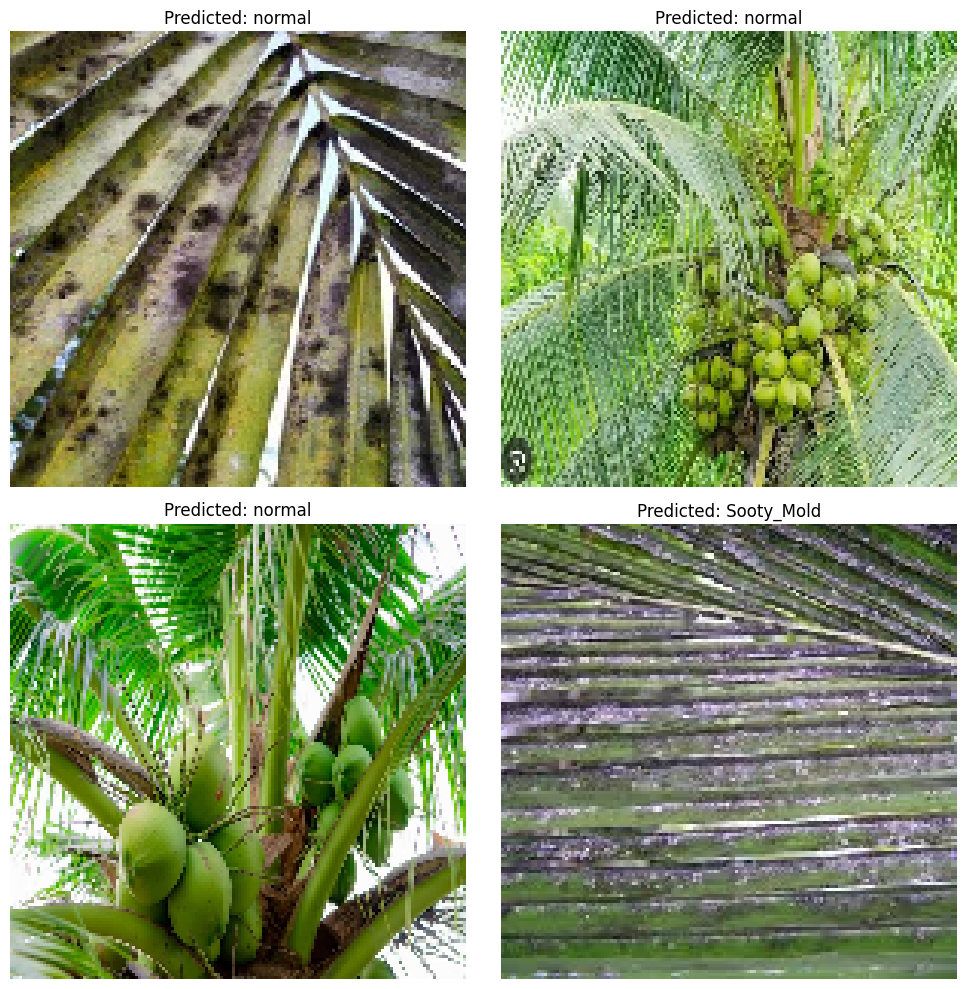

In [23]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

def process_and_predict(image_path, model, class_labels):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(150, 150))  
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Rescale pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    predictions = model.predict(img_array)

    # Get the predicted class
    predicted_class_index = np.argmax(predictions)
    predicted_class_label = list(class_labels.keys())[list(class_labels.values()).index(predicted_class_index)]

    return img, predicted_class_label

image_paths = [
    r"E:\leaf1.jpg",
    r"E:\leaf2.jpg",
    r"E:\leaf3.jpg",
    r"E:\leaf4.jpg"
]
class_labels = train_generator.class_indices 

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for i, image_path in enumerate(image_paths):
    img, predicted_class_label = process_and_predict(image_path, model, class_labels)
    
    ax = axes[i // 2, i % 2]

    ax.imshow(img)
    ax.set_title(f"Predicted: {predicted_class_label}")
    ax.axis('off')  # Hide the axis labels

plt.tight_layout()
plt.show()


14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 701ms/step


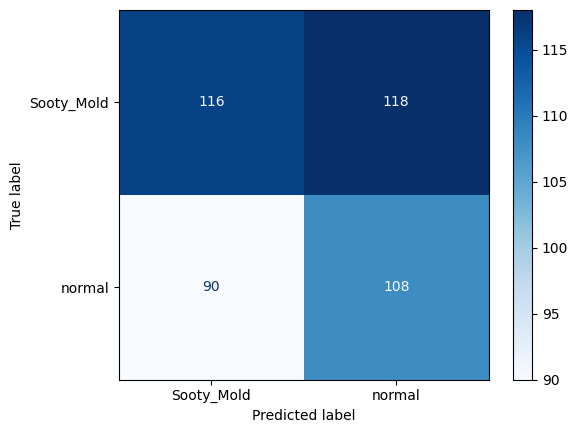

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the test set
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices)
disp.plot(cmap=plt.cm.Blues)
plt.show()

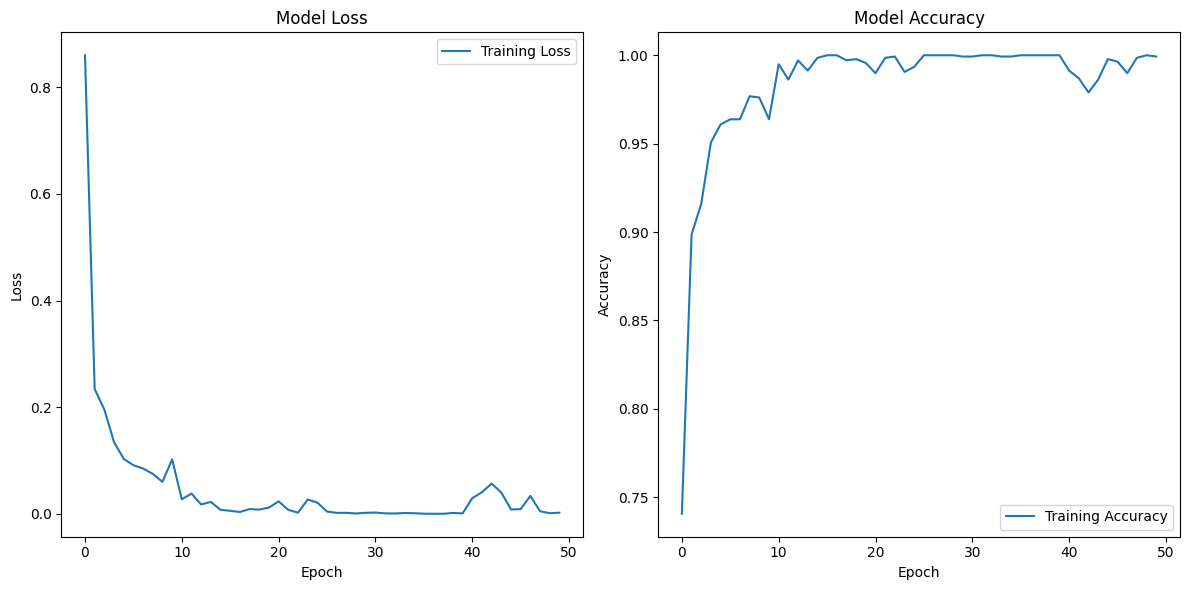

In [25]:
# Plot training & validation loss and accuracy values
plt.figure(figsize=(12, 6))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

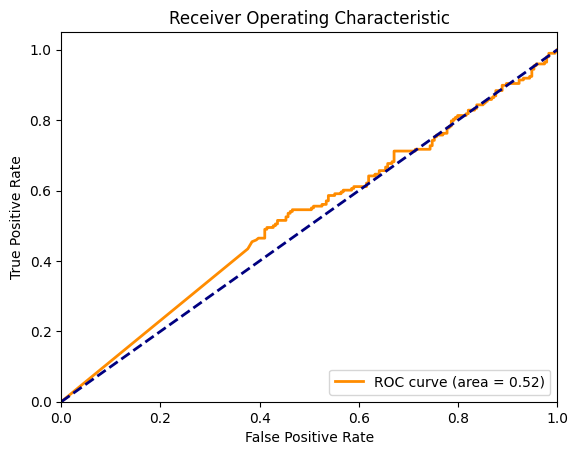

In [26]:
from sklearn.metrics import roc_curve, auc

# Assuming binary classification, so we only need the probabilities for the positive class
y_pred_prob = y_pred[:, 1]  # Probability of the second class (assuming positive class)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()